In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import joblib
from src.operational import process_features_dataframe

plt.style.use('fivethirtyeight')


In [8]:
df = pd.read_pickle('data/ec_forecast_eval.pickle')
model = joblib.load('model/model.joblib')

In [9]:
forecast = {}
for date in df.columns:
    X = df.loc['fc', date]
    X = process_features_dataframe(X)
    pred = model.predict(X)
    forecast[date] = pd.Series(pred, X.index)

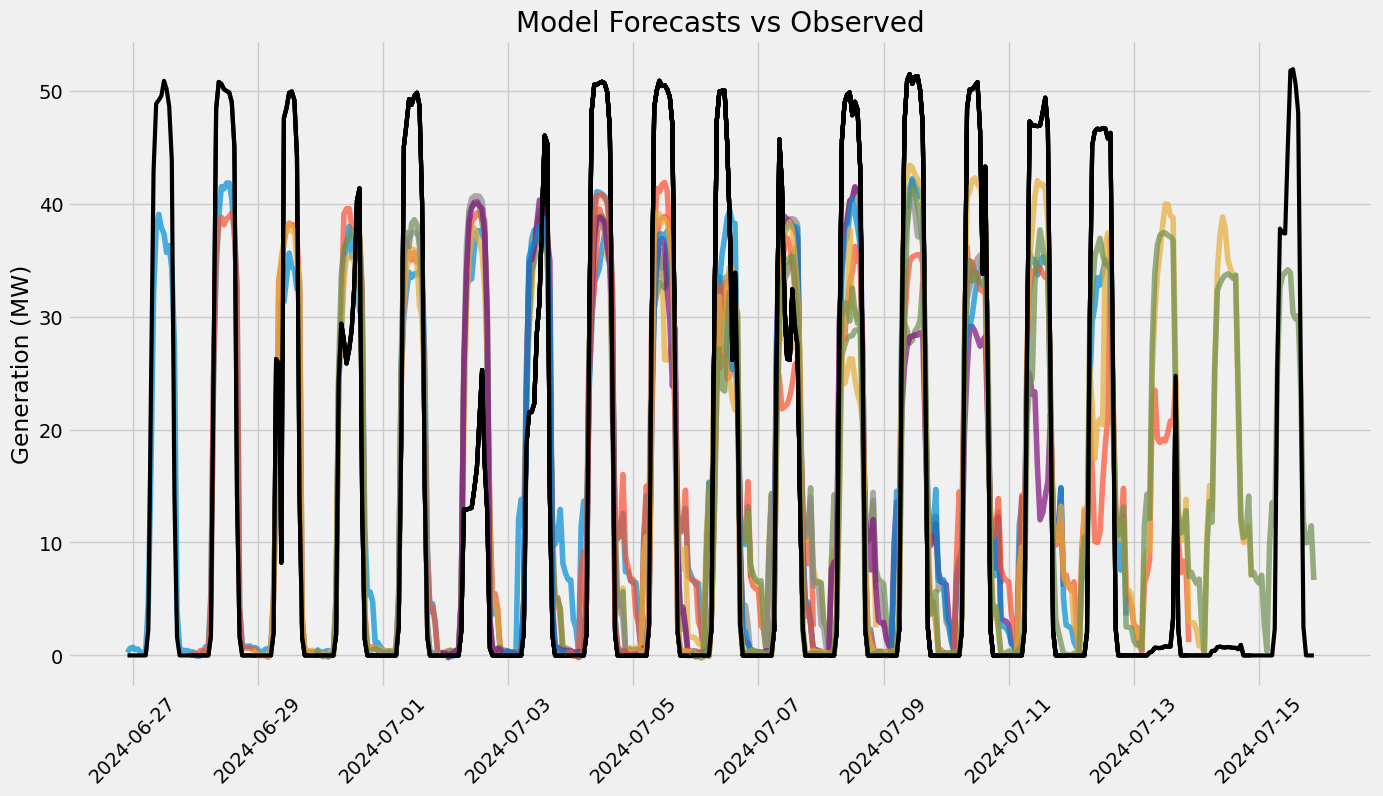

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
for c in df.columns[-60:-50]:
  ax.plot(forecast[c], alpha = 0.7)
  ax.plot(df.loc['obs', c], color = 'k', lw=3)

plt.ylabel('Generation (MW)')
plt.title('Model Forecasts vs Observed')
plt.xticks(rotation=45)
plt.show()

In [11]:
maes = []
for c in df.columns:
  maes.append(mean_absolute_error(df.loc['obs', c], forecast[c]))

In [12]:
sum(maes)/len(maes)

np.float64(7.874837446760645)